In [1]:
%matplotlib inline

Embedding quality [adjusted Rand index]: 0.87    data: (400, 10)   #classes: 8


/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn("".join(errors),RuntimeWarning)


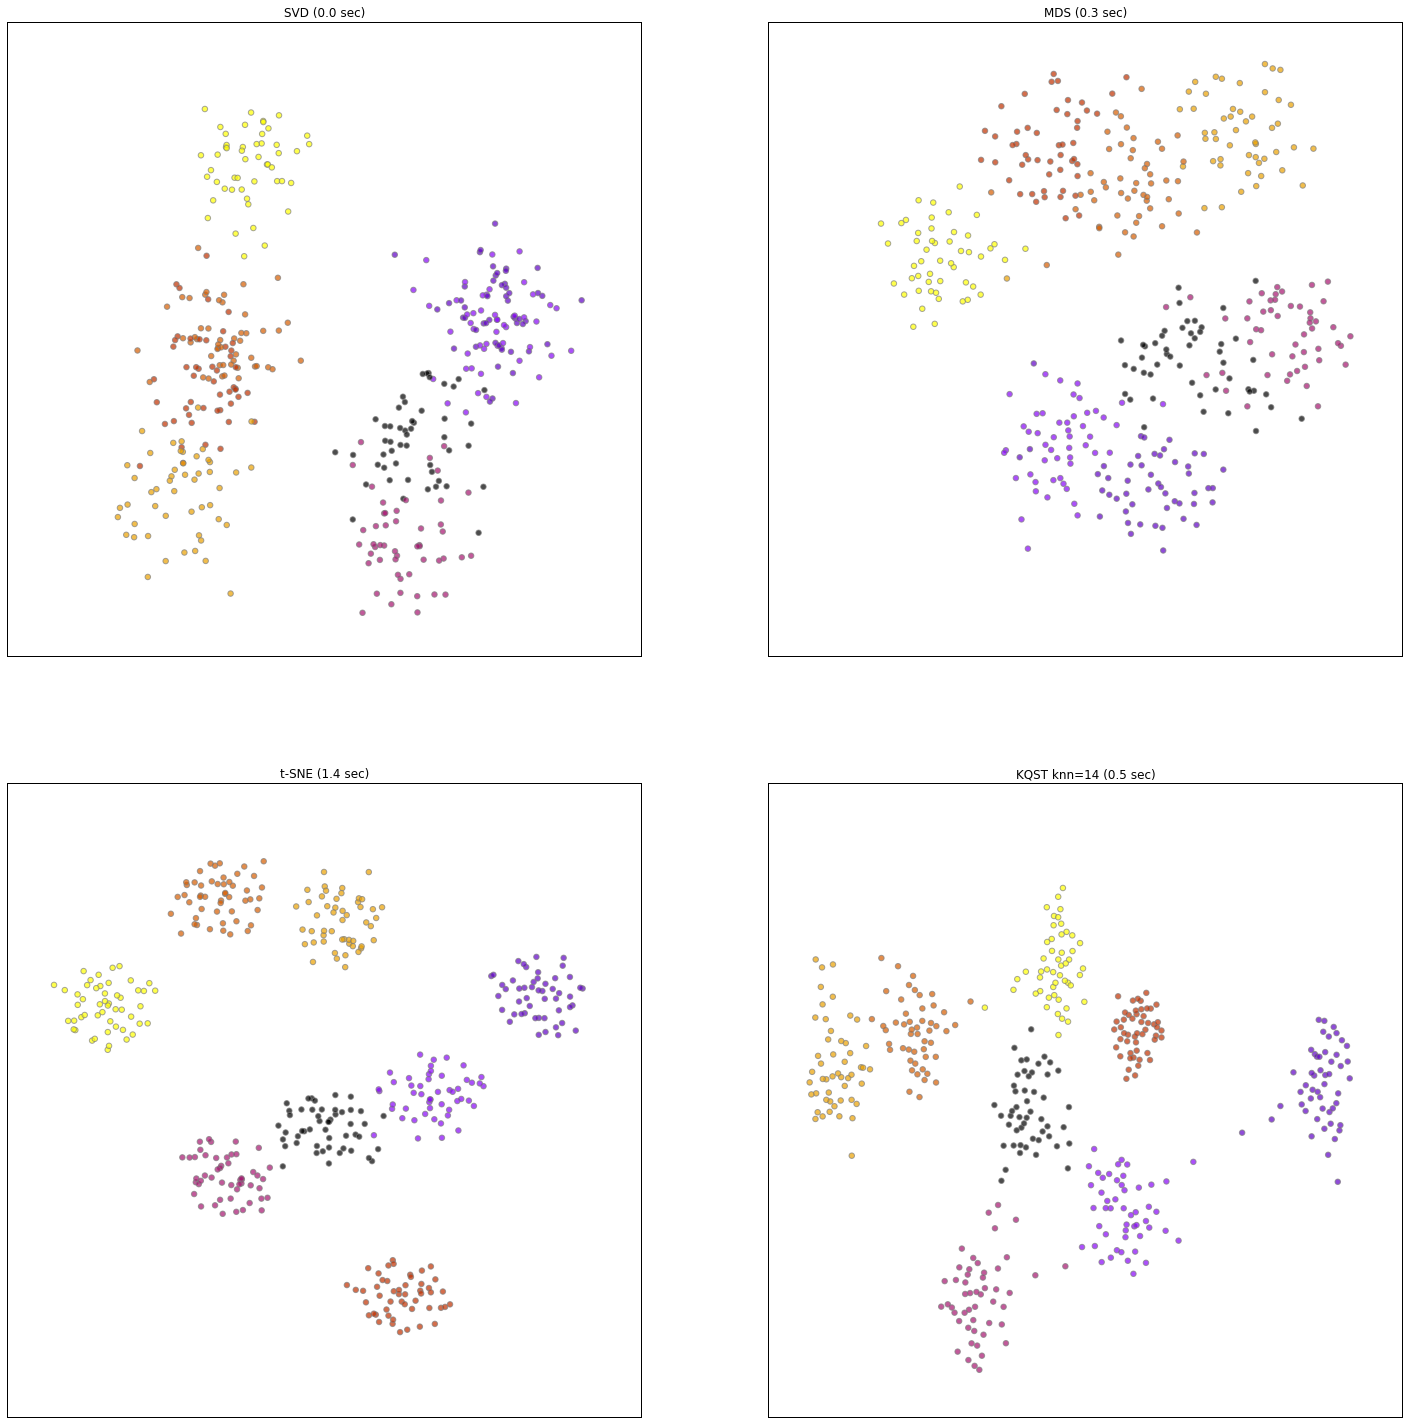

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=8, n_features=10, cluster_std=3, random_state=0)

opts={'knn': 14, 'metric': 'rbf', 'k_threshold': 0.9, 'gamma': 1e-3}
from eden.embedding import display_embedding, embedding_quality
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

Embedding quality [adjusted Rand index]: 0.87    data: (150, 4)   #classes: 3


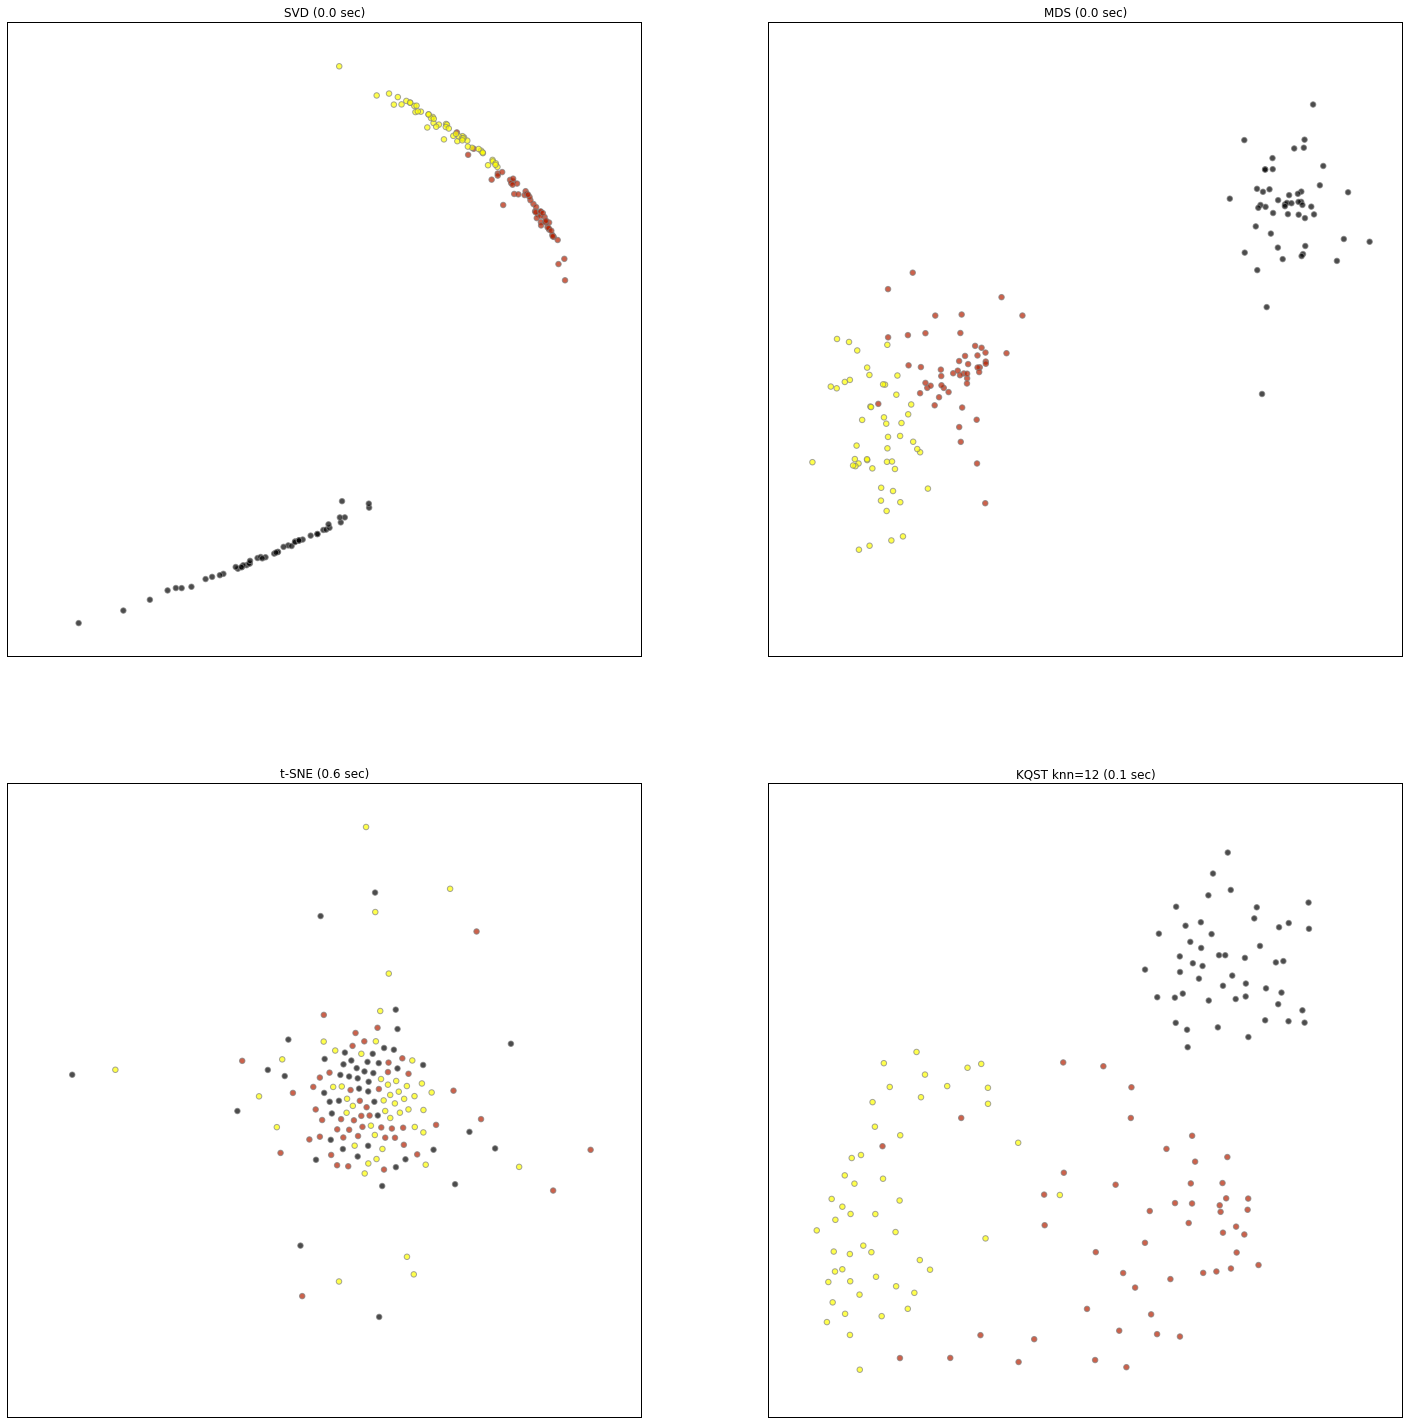

In [3]:
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.preprocessing import normalize,scale
X = normalize(X)
labels=[str(y_val)+'_'+str(i) for i,y_val in enumerate(y)]


opts={'knn': 12, 'metric': 'rbf', 'k_threshold': 0.8, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

Embedding quality [adjusted Rand index]: 0.89    data: (1083, 64)   #classes: 6


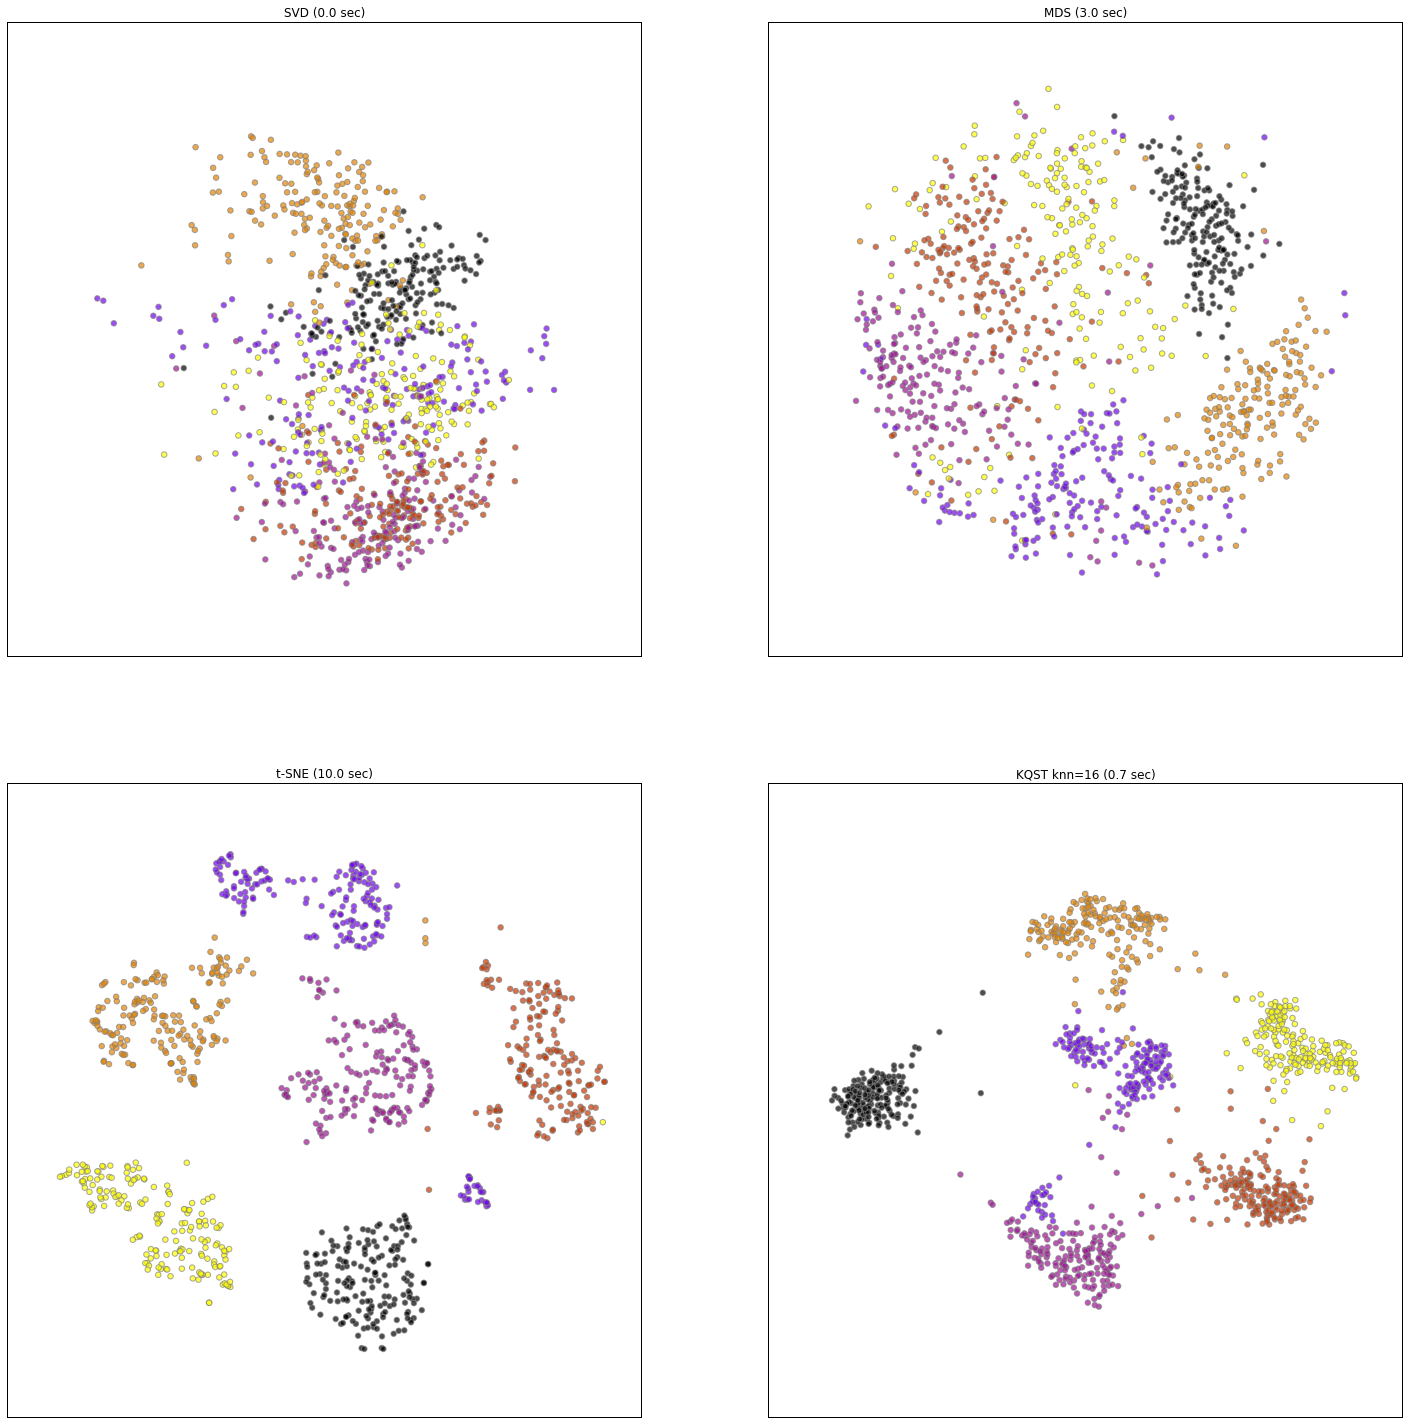

CPU times: user 14.1 s, sys: 1.43 s, total: 15.6 s
Wall time: 15.8 s


In [4]:
%%time
%matplotlib inline
from sklearn import datasets
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
from sklearn.preprocessing import normalize,scale
X = normalize(X)

opts={'knn': 16, 'metric': 'rbf', 'k_threshold': 0.9, 'gamma': 1e-4}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [5]:
def rfam_uri(family_id):
        return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_to_matrix(rfam_id, n_max=50, complexity=2):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    from itertools import islice
    seqs = islice(seqs,n_max)
    from eden.converter.rna.rnafold import rnafold_to_eden
    graphs = rnafold_to_eden(seqs)

    from eden.graph import Vectorizer
    vectorizer = Vectorizer(complexity)
    X = vectorizer.transform(graphs)
    return X

def rfam_data(rfam_ids, n_max=100, complexity=2):
    import numpy as np
    from scipy.sparse import vstack
    for i,rfam_id in enumerate(rfam_ids):
        X_=rfam_to_matrix(rfam_id, n_max=n_max, complexity=complexity)
        y_ = [i] * X_.shape[0]
        if i==0:
            X=X_
            y=y_
        else:
            X = vstack([X, X_], format="csr")
            y=y+y_
    y = np.array(y)
    return X,y

In [6]:
%%time
rfam_ids=['RF00004','RF00005','RF00015','RF00020','RF00026','RF00169',
          'RF00380','RF00386','RF01051','RF01055','RF01234','RF01699',
          'RF01701','RF01705','RF01731','RF01734','RF01745','RF01750',
          'RF01942','RF01998','RF02005','RF02012','RF02034']

X,y = rfam_data(rfam_ids[0:5],n_max=200, complexity=2)

CPU times: user 23.1 s, sys: 3.69 s, total: 26.8 s
Wall time: 45.9 s


Embedding quality [adjusted Rand index]: 0.19    data: (938, 1048577)   #classes: 5


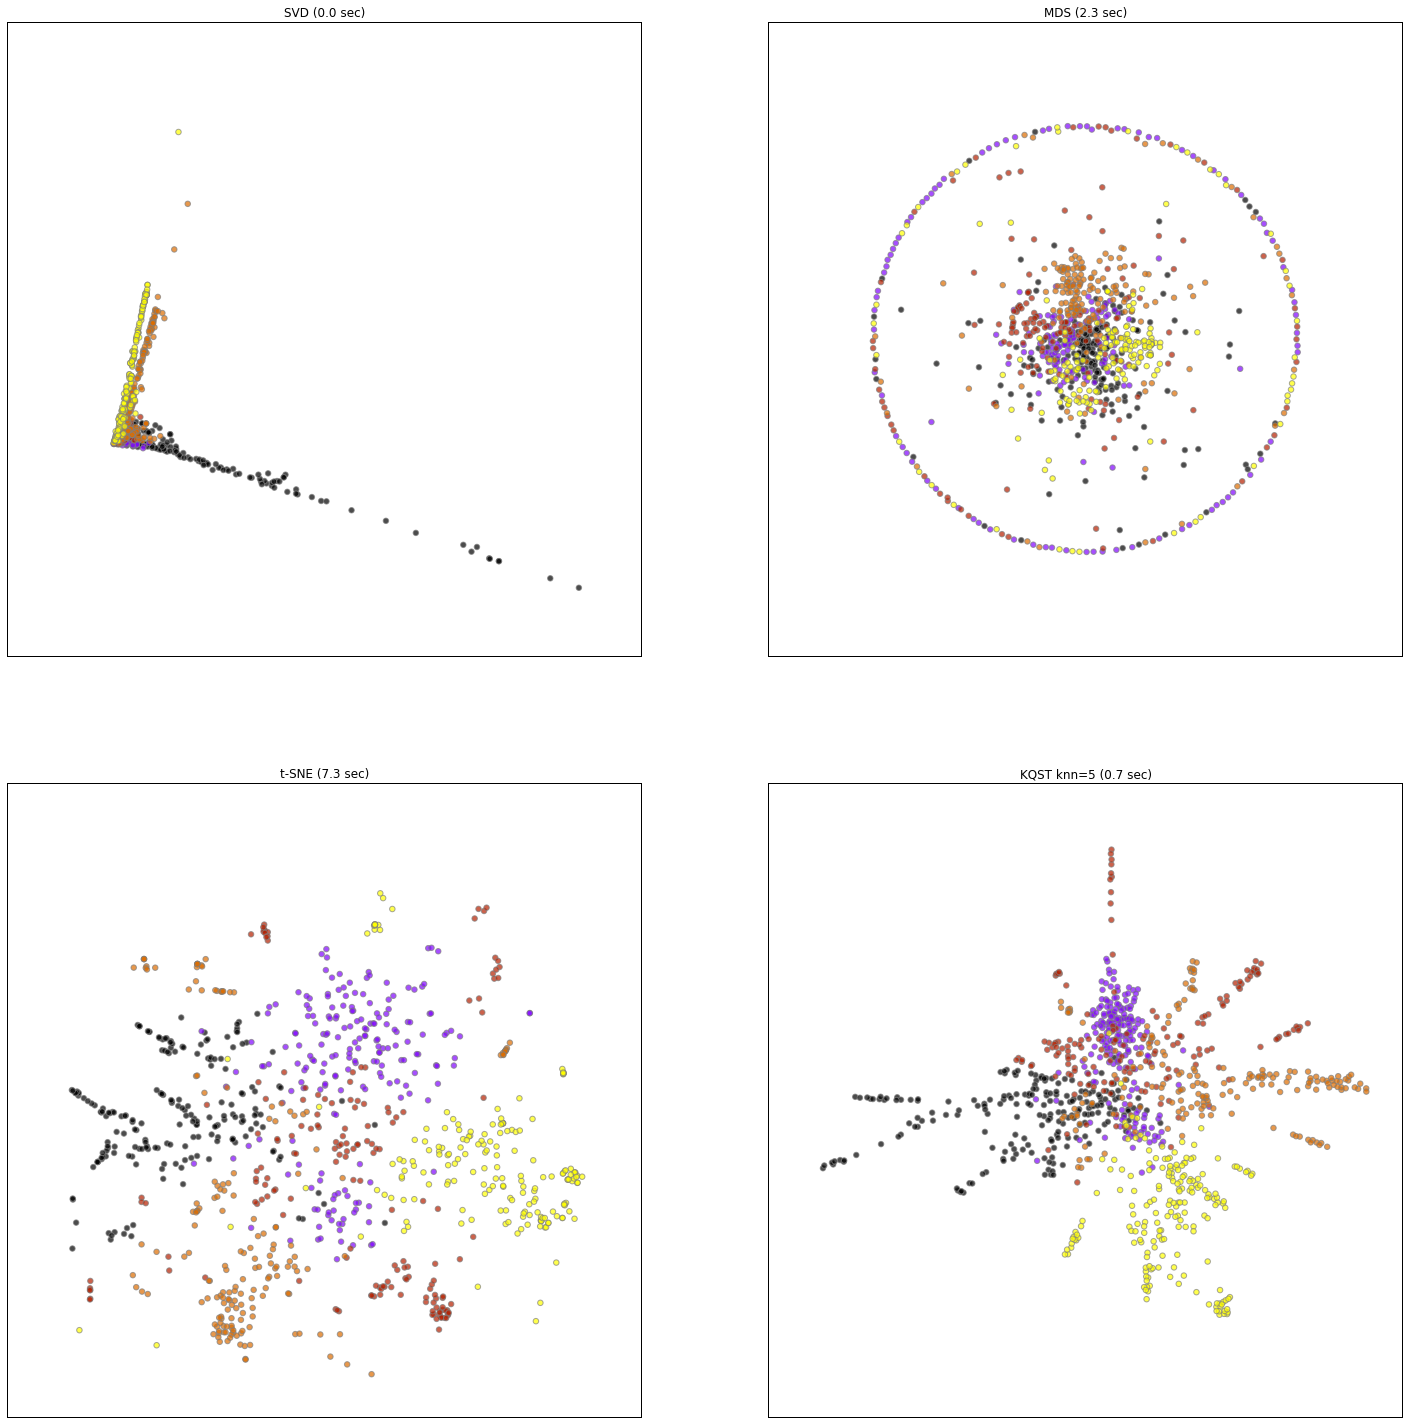

In [7]:
opts={'knn': 5, 'metric': 'rbf', 'k_threshold': 0.97, 'gamma': 1e-3}
low_dim = 200
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
display_embedding(X,y, opts, low_dim=low_dim)

In [8]:
%%time
%matplotlib inline

from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
n_max=1000
pos_graphs = islice(gspan_to_eden('http://www.bioinf.uni-freiburg.de/~costa/bursi_pos_train.gspan'),n_max)
neg_graphs = islice(gspan_to_eden('http://www.bioinf.uni-freiburg.de/~costa/bursi_neg_train.gspan'),n_max)

from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=3)

import numpy as np
from scipy.sparse import vstack
Xpos = vectorizer.transform(pos_graphs)
Xneg = vectorizer.transform(neg_graphs)
yp = [1] * Xpos.shape[0]
yn = [-1] * Xneg.shape[0]
y = np.array(yp + yn)
X = vstack([Xpos, Xneg], format="csr")

opts={'knn': 10, 'metric': 'rbf', 'k_threshold': 0.95, 'gamma': 1e-3}
low_dim = 200
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
embed(X,y, opts, low_dim=low_dim)

Embedding quality [adjusted Rand index]: 0.04    data: (2000, 1048577)   #classes: 2


NameError: name 'embed' is not defined

In [ ]:
%%time
%matplotlib inline
#breast-cancer-wisconsin
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
from eden.util import read
M=[]
labels=[]
for line in read(uri):
    line = line.strip()
    if line:
        items = line.split(',')
        label = str(items[1])
        labels.append(label)
        data = [float(x) for x in items[2:]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
y=np.array(labels)

opts={'knn': 12, 'metric': 'rbf', 'k_threshold': 0.75, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
from eden.util import read
M=[]
labels=[]
for line in read(uri):
    line = line.strip()
    if line:
        items = line.split(',')
        label = int(items[0])
        labels.append(label)
        data = [float(x) for x in items[1:]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
y=np.array(labels)

opts={'knn': 7, 'metric': 'rbf', 'k_threshold': 0.9, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = int(items[-1])//7
        labels.append(label)
        data = [float(x) for x in items[1:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
y=np.array(labels)

opts={'knn': 15, 'metric': 'rbf', 'k_threshold': 0.98, 'gamma': 1e-3}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = scale(np.array(M))
y=np.array(labels)

opts={'knn': 12, 'metric': 'rbf', 'k_threshold': 0.90, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(',')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

            
import numpy as np
from sklearn.preprocessing import normalize,scale
X = (np.array(M))
y=np.array(labels)

opts={'knn': 17, 'metric': 'rbf', 'k_threshold': 0.97, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split(';')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

import numpy as np
from sklearn.preprocessing import normalize,scale
X = (np.array(M))
y=np.array(labels)

opts={'knn': 12, 'metric': 'rbf', 'k_threshold': 0.90, 'gamma': 5e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00230/plrx.txt'
n_max=700

from eden.util import read
M=[]
labels=[]
counter = 0
for line in read(uri):
    counter += 1
    if counter > n_max:
        break
    line = line.strip()
    if line:
        items = line.split('\t')
        label = hash(items[-1])
        labels.append(label)
        data = [float(x) for x in items[:-1]]
        M.append(data)

import numpy as np
from sklearn.preprocessing import normalize,scale
X = normalize(np.array(M))
y=np.array(labels)

opts={'knn': 100, 'metric': 'rbf', 'k_threshold': 0.5, 'gamma': 1e-2}
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts), X.shape, len(set(y)))
display_embedding(X,y, opts)

In [ ]:
%%time 
%matplotlib inline
import numpy as np

n_max = 500

def load_data(uri):
    from eden.util import read
    M=[]
    labels=[]
    counter = 0
    for line in read(uri):
        counter += 1
        if counter > n_max:
            break
        line = line.strip()
        if line:
            items = line.split(' ')
            label = hash(items[-1])&13
            labels.append(label)
            data = [float(x) for x in items[:-1]]
            M.append(data)
    X = np.array(M)
    y=np.array(labels)
    return X,y

for i,c in enumerate('abcdefghi'):
    uri = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xa%s.dat'%c
    X_,y_ = load_data(uri)
    if i==0:
        X=X_
        y=y_
    else:
        X=np.vstack((X,X_))
        y=np.hstack((y,y_))

from sklearn.preprocessing import normalize,scale
X = normalize(X)

opts={'knn': 150, 'metric': 'rbf', 'k_threshold': 0.85, 'gamma': 1e-4}
low_dim = 5
print 'Embedding quality [adjusted Rand index]: %.2f    data: %s   #classes: %d' % (embedding_quality(X, y, opts, low_dim=low_dim), X.shape, len(set(y)))
display_embedding(X,y, opts, low_dim=low_dim)